# Project 1 - SAT and ACT Scores in 2017

GOAL: Suppose that the College Board - the organization that administers the SAT - seeks to improve the participation rate of its exams. Analyse partipation rates for ACT and SAT and provide recommendations to improve the participation rate


## Step 1: Load the data and perform basic operations.

##### 1. Load the data in using pandas.

In [1]:
# import statements
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats

%matplotlib inline

In [2]:
import altair as alt
alt.renderers.enable('notebook') # show and interact ith plots in jupyter notebook

RendererRegistry.enable('notebook')

In [3]:
# load ACT scores; examination of the file showed that the first column is an index so let's declare that on import rather than later
df_act = pd.read_csv('act.csv',index_col =0)
df_act.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


In [7]:
# load SAT scores. again, first column is an index
df_sat = pd.read_csv('sat.csv', index_col =0)
df_sat.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


#### check the columns /datatypes

In [8]:
df_act.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null object
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null float64
dtypes: float64(5), object(2)
memory usage: 3.2+ KB


In [9]:
df_sat.shape

(51, 5)

In [10]:
df_act.shape

(52, 7)

#### ACT Score DataSet description

The ACT test (American College Testing) is a standardized test used for college admissions in the United States.  This dataset summarizes the average scores for each state, plus the national level.  This data is for the graduating class of 2017 (https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows).  The test has four components (English, Math, Reading and Science)


* State: There is one row in this data set for each state with the average scores for that state.  This column is text and is contains the full state name (not an abbreviation).  This dataset also contains one row for National

* Participation: The percentage of graduating high school students in that State who wrote the ACT.  This varies widely -- in some states, the test is mandatory for graduates (100% participation) while, for others, only a small percentage of students choose to write the ACT.  Value is an integer (whole number) percentage (i.e. "90%")

* English: Average English score for state.  Numeric (decimal/float) scores with values between 1 and 36.  Scores are scaled to ensure consistency across different "runs" of the test (https://blog.prepscholar.com/how-is-the-act-scored)

* Math: Average Math score for state.  Numeric (decimal/float) scores with values between 1 and 36 and are scaled as above

* Reading: Average Reading score for state.  Numeric (decimal/float) scores with values between 1 and 36 and are scaled as above

* Science: Average Science score for state.  Numeric (decimal/float) scores with values between 1 and 36 and are scaled as above

* Composite: The average of the four test sections above.  Numeric (decimal/float) scores with values between 1 and 36.


#### SAT Score DataSet description

The SAT (originally thet Scholastic Assessment Test) is another standardized test used for college admissions in the United States. This dataset summarizes the average scores for each state and is for the graduating class of 2017 (https://blog.prepscholar.com/average-sat-scores-by-state-most-recent)

The SAT has three sections: 1)Reading, 2) Writing and Language and 3) Math. In the SAT results, the Reading and Writing sections are combined to produce one final score, called Evidence-Based Reading and Writing (EBRW).  Both Math and Evidence-Based Reading and Writing (EBRW) are scored on a scale of 200-800.  The scores are combined to produce the total SAT Score, which ranges from 400-1600

By combining these two sections, we get a total SAT score range of 400-1600, with 1600 being a perfect score.

* State: There is one row in this data set for each state with the average scores for that state. This column is text and is contains the full state name (not an abbreviation).

* Participation: Percentage of graduates from that state who wrote the SAT.  Value is an integer (whole number) percentage (i.e. "90%")

* Evidence-Based Reading and Writing: Average score for Evidence-Based Reading and Writing section of SAT.  Integer (whole) value ranging from 200-800

* Math: Average score for Math section of SAT.  Integer (whole) value ranging from 200-800

* Total: Combined total average score of above two sections.  Integer (whole) value range from 400-1600

##### 4. Does the data look complete? Are there any obvious issues with the observations?
* There is a difference in the number of row between the two data sets.  Sat only has 51 rows, while ACT has 52
* ACT contains national scores while the SAT df does not
* also, there are 51 rows instead of the expected 50 states because of the District of Columbia

In [12]:

df_sat[(df_sat['State']=='National')]


,State,Participation,Evidence-Based Reading and Writing,Math,Total


In [365]:
df_sat[(df_sat['State']=='District of Columbia')]

,State,Participation,Evidence-Based Reading and Writing,Math,Total
8,District of Columbia,100%,482,468,950


In [13]:
df_sat.describe()

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,569.117647,547.627451,1126.098039
std,45.666901,84.909119,92.494812
min,482.000000,52.000000,950.000000
25%,533.500000,522.000000,1055.500000
50%,559.000000,548.000000,1107.000000
75%,613.000000,599.000000,1212.000000
max,644.000000,651.000000,1295.000000


* there are 51 entries in all columns
* means and maxs look ok for the three score columns, should be between 200-800 for the first 2 cols and 400-1600 for the Total col
* HOWEVER, the minimum Math score of 52 looks quite suspicious... let's take a closer look

In [14]:
df_sat[(df_sat['Math']<400)]
# Maryland had an sat participation rate of 69% but such an extraordinarily low math score, 52, that it seems to be  typo
# in this case, sat total socre is sum of the verbal and math scores adn so we can 
# recalculate it

,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,69%,536,52,1060


We can see that we only have one extremely low math score, which is for the state of Maryland

* Maryland had a reasonable SAT participation rate of 69% 
* The math score is extraordinarily low (52) and, in fact, out of the valid range of SAT scores (200-800) 
* under other circumstances, we might need to estimate the value or drop the row
* but in this case, we can recalculate by substracting the verbal score from the total score (the total score is cumulative)
* so let's fix this...


In [15]:
#update at index 20 (maryland)
df_sat.loc[[20],['Math']]  = (df_sat[ df_sat['State'] =='Maryland']['Total'] - df_sat[ df_sat['State'] =='Maryland']['Evidence-Based Reading and Writing'])
df_sat.loc[[20],['Math']]


,Math
20,524


In [16]:
df_act.describe()
# 52 entries in all cols
# mean/max scores look ok for scores expected in range 1-36
# but again, we have one suspiciously low Science Min score of 2.3... let's take a closer look

,English,Math,Reading,Science,Composite
count,52.000000,52.000000,52.000000,52.000000,52.000000
mean,20.919231,21.173077,22.001923,21.040385,21.509615
std,2.332132,1.963602,2.048672,3.151113,2.002083
min,16.300000,18.000000,18.100000,2.300000,17.800000
25%,19.000000,19.400000,20.475000,19.900000,19.800000
50%,20.550000,20.900000,21.700000,21.150000,21.400000
75%,23.300000,23.100000,24.125000,22.525000,23.600000
max,25.500000,25.300000,26.000000,24.900000,25.500000


In [17]:
# take a closer look at the low score
df_act[(df_act['Science'] < 10)]


,State,Participation,English,Math,Reading,Science,Composite
21,Maryland,28%,23.3,23.1,24.2,2.3,23.6


* Again, the issue is Maryland 
* composite score is an average of the others
* it doesn't make sense for Maryland to have a composite score of 23.6 given the provided values, which supports the fact that
* the science score is wrong (plus it seems highly unlikely that an entire state's worth of students would be so horrible at Math!!)

In [18]:
#update at index 20 (maryland)
# df_sat.loc[[20],['Math']]  = (df_sat[ df_sat['State'] =='Maryland']['Total'] - df_sat[ df_sat['State'] =='Maryland']['Evidence-Based Reading and Writing'])
# df_sat.loc[[20],['Math']]
current_maryland_avg = np.mean(df_act[['English','Math','Reading','Science']][ df_act['State'] =='Maryland'].T)
print(f"If the Science score is correct, Maryland's composite score should be {current_maryland_avg.iloc[0]}")


If the Science score is correct, Maryland's composite score should be 18.225


In [19]:
# work backwards to calculate the correct math score
# (23.3 + 23.1 + 24.2 + x)/4 = 23.6
# 23.3 + 23.1 + 24.2 + x = 23.6 *4
# 23.3 + 23.1 + 24.2 + x =94.4
# x = 23.8
real_maryland_average = df_act['Composite'][ df_act['State'] =='Maryland'].iloc[0]
real_maryland_average
maryland_df=df_act[['English','Math','Reading','Science']][ df_act['State'] =='Maryland']
sum_other_scores = maryland_df['English'].iloc[0] + maryland_df['Math'].iloc[0] + maryland_df['Reading'].iloc[0]
sum_other_scores
maryland_science = round((real_maryland_average *4) - sum_other_scores,2)
maryland_science
df_act.loc[[21],['Science']]=maryland_science
df_act[(df_act['Science'] < 10)]

,State,Participation,English,Math,Reading,Science,Composite


In [22]:
# Previous info() call showed that there are no null/missing values, but let's check again explicitly.  Everything looks good
#df_act.isnull().any()
df_act.isnull().sum()

State            0
Participation    0
English          0
Math             0
Reading          0
Science          0
Composite        0
dtype: int64

In [23]:
df_sat.isnull().any()

State                                 False
Participation                         False
Evidence-Based Reading and Writing    False
Math                                  False
Total                                 False
dtype: bool

##### Check the dtypes of each column.

In [377]:
df_act.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

In [378]:
df_sat.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

* The Participation column in both dataframes is showing as a string ('object') and, since it is a percentage, 
* should be converted to a float 
* the issue is likely the presence of the %age sign so start by just replacign that

In [24]:
df_act['Participation']=df_act['Participation'].apply(lambda x: float(x.replace('%','')))

df_act.head()

,State,Participation,English,Math,Reading,Science,Composite
0,National,60.0,20.3,20.7,21.4,21.0,21.0
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8
3,Arizona,62.0,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4


In [25]:
df_act.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

In [26]:
# repeat for Sat
df_sat['Participation']=df_sat['Participation'].apply(lambda x: float(x.replace('%','')))

df_sat.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5.0,593,572,1165
1,Alaska,38.0,547,533,1080
2,Arizona,30.0,563,553,1116
3,Arkansas,3.0,614,594,1208
4,California,53.0,531,524,1055


In [27]:
df_sat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null float64
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: float64(1), int64(3), object(1)
memory usage: 4.9+ KB


##### 7. Create a dictionary for each column mapping the State to its respective value for that column. (For example, you should have three SAT dictionaries.)

In [28]:
# I assume this means that we want State as the Key and the particular score as the value

# we can use the to_dict() function to create a dictionary out of our dataframe
# but need to first set State as the index so that correctly generates key/value pairs using State / <column> score
# the resulting dictionary has a key for each colum (Math, Total etc) that contains a nested dictorary with the state/score pairs

sat_dict=df_sat.set_index('State').to_dict()
sat_math_dict = sat_dict['Math']
print(f"The SAT Math score for Alabama is {sat_math_dict['Alabama']}") # show we can pass in a State and get back the math score as expected


The SAT Math score for Alabama is 572


In [29]:
sat_rw_dict = sat_dict['Evidence-Based Reading and Writing']
print(f"The SAT RW score for Alabama is {sat_rw_dict['Arizona']}")

The SAT RW score for Alabama is 563


In [30]:

sat_total_dict = sat_dict['Total']
print(f"The SAT Total score for Alabama is {sat_total_dict['Arizona']}") # again get average Total score for Arizona

The SAT Total score for Alabama is 1116


In [31]:
# repeat above for ACT
act_dict=df_act.set_index('State').to_dict()
act_eng_dict = act_dict['English']
print(f"The ACT English score for Alabama is {act_eng_dict['Alabama']}") # show we can pass in a State and get back the math score as expected


The ACT English score for Alabama is 18.9


In [33]:

act_math_dict = act_dict['Math']
print(f"The ACT Math score for Alabama is {act_math_dict['Arizona']}") # again get average Math score for Arizona

The ACT Math score for Alabama is 19.8


In [34]:

act_read_dict = act_dict['Reading']
print(f"The ACT Reading score for Alabama is {act_read_dict['Arizona']}") # again get average Reading score for Arizona

The ACT Reading score for Alabama is 20.1


In [35]:

act_sci_dict = act_dict['Science']
print(f"The ACT Science score for Alabama is {act_sci_dict['Arizona']}") # again get average Science score for Arizona

The ACT Science score for Alabama is 19.8


In [36]:

act_comp_dict = act_dict['Composite']
print(f"The ACT Composite score for Alabama is {act_comp_dict['Arizona']}") # again get average Composite score for Arizona

The ACT Composite score for Alabama is 19.7


##### 8. Create one dictionary where each key is the column name, and each value is an iterable (a list or a Pandas Series) of all the values in that column.

In [37]:
cols_dict = df_sat.to_dict('list')
cols_dict['Participation']

[5.0,
 38.0,
 30.0,
 3.0,
 53.0,
 11.0,
 100.0,
 100.0,
 100.0,
 83.0,
 61.0,
 55.0,
 93.0,
 9.0,
 63.0,
 2.0,
 4.0,
 4.0,
 4.0,
 95.0,
 69.0,
 76.0,
 100.0,
 3.0,
 2.0,
 3.0,
 10.0,
 3.0,
 26.0,
 96.0,
 70.0,
 11.0,
 67.0,
 49.0,
 2.0,
 12.0,
 7.0,
 43.0,
 65.0,
 71.0,
 50.0,
 3.0,
 5.0,
 62.0,
 3.0,
 60.0,
 65.0,
 64.0,
 14.0,
 3.0,
 3.0]

##### 9. Merge the dataframes on the state column.

In [38]:
df_act.head(2)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60.0,20.3,20.7,21.4,21.0,21.0
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2


In [39]:
# rename columns before merging for clarity
df_sat.rename(inplace=True, columns={'Math': 'sat_math','Total': 'sat_total','Evidence-Based Reading and Writing': 'sat_rw', 'Participation': 'sat_participation'})
df_act.rename(inplace=True, columns={'Participation': 'act_participation','English': 'act_english','Math': 'act_math','Reading': 'act_reading', 'Science': 'act_science', 'Composite': 'act_composite'})


In [40]:
# merge the datasets together, matching up on the State column
df_merged = pd.merge(df_sat,df_act,on='State')
df_merged.head()


,State,sat_participation,sat_rw,sat_math,sat_total,act_participation,act_english,act_math,act_reading,act_science,act_composite
0,Alabama,5.0,593,572,1165,100.0,18.9,18.4,19.7,19.4,19.2
1,Alaska,38.0,547,533,1080,65.0,18.7,19.8,20.4,19.9,19.8
2,Arizona,30.0,563,553,1116,62.0,18.6,19.8,20.1,19.8,19.7
3,Arkansas,3.0,614,594,1208,100.0,18.9,19.0,19.7,19.5,19.4
4,California,53.0,531,524,1055,31.0,22.5,22.7,23.1,22.2,22.8


In [41]:
df_merged.shape

(51, 11)

##### 11. Print the minimum and maximum of each numeric column in the data frame.

In [42]:
# create list with score type, min and max
score_min_maxes=[[col, df_merged[col].min(), df_merged[col].max()] for col in df_merged.columns[1:] ]
score_min_maxes

[['sat_participation', 2.0, 100.0],
 ['sat_rw', 482, 644],
 ['sat_math', 468, 651],
 ['sat_total', 950, 1295],
 ['act_participation', 8.0, 100.0],
 ['act_english', 16.3, 25.5],
 ['act_math', 18.0, 25.3],
 ['act_reading', 18.1, 26.0],
 ['act_science', 18.2, 24.9],
 ['act_composite', 17.8, 25.5]]

In [43]:
# double chec above-- looks good
df_merged.describe()

,sat_participation,sat_rw,sat_math,sat_total,act_participation,act_english,act_math,act_reading,act_science,act_composite
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,39.803922,569.117647,556.882353,1126.098039,65.254902,20.931373,21.182353,22.013725,21.462745,21.519608
std,35.276632,45.666901,47.121395,92.494812,32.140842,2.353677,1.981989,2.067271,1.753392,2.020695
min,2.000000,482.000000,468.000000,950.000000,8.000000,16.300000,18.000000,18.100000,18.200000,17.800000
25%,4.000000,533.500000,523.500000,1055.500000,31.000000,19.000000,19.400000,20.450000,19.950000,19.800000
50%,38.000000,559.000000,548.000000,1107.000000,69.000000,20.700000,20.900000,21.800000,21.300000,21.400000
75%,66.000000,613.000000,599.000000,1212.000000,100.000000,23.300000,23.100000,24.150000,23.200000,23.600000
max,100.000000,644.000000,651.000000,1295.000000,100.000000,25.500000,25.300000,26.000000,24.900000,25.500000


##### 12. Write a function using only list comprehensions, no loops, to compute standard deviation. Using this function, calculate the standard deviation of each numeric column in both data sets. Add these to a list called `sd`.

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

In [44]:
# ok, first let's build up the formula for one column -- SAT_RW
print(np.sqrt(sum([ (val- df_merged['sat_rw'].mean() )**2   for val in df_merged['sat_rw']]) * (1/len(df_merged['sat_rw']))))
print(df_merged['sat_rw'].std()) # compare with pandas standard deviation value as a santity check

45.21697020437866
45.66690138768932


In [45]:
# now loop through the columns, skipping the first column (State)
# Note: this is ok for a small dataset but likely wouldn't perform well on a large dataset
sd=[ np.sqrt(sum([ (val- df_merged[col].mean() )**2   for val in df_merged[col]]) * (1/len(df_merged[col]))) for col in df_merged.columns[1:]]
sd


[34.92907076664508,
 45.21697020437866,
 46.65713364485503,
 91.58351056778743,
 31.824175751231806,
 2.3304876369363363,
 1.9624620273436781,
 2.0469029314842646,
 1.7361170088327353,
 2.000786081581989]

In [46]:
df_merged.std() # compare to pandas version of standard deviation ... not bad

sat_participation    35.276632
sat_rw               45.666901
sat_math             47.121395
sat_total            92.494812
act_participation    32.140842
act_english           2.353677
act_math              1.981989
act_reading           2.067271
act_science           1.753392
act_composite         2.020695
dtype: float64

## Step 2: Manipulate the dataframe

##### 13. Turn the list `sd` into a new observation in your dataset.

In [47]:
# add in an entry that will be populated to the State column
sd.insert(0,'StdDev')
sd

['StdDev',
 34.92907076664508,
 45.21697020437866,
 46.65713364485503,
 91.58351056778743,
 31.824175751231806,
 2.3304876369363363,
 1.9624620273436781,
 2.0469029314842646,
 1.7361170088327353,
 2.000786081581989]

In [48]:
# get a list of the column names in our merged data frame
mycols = list(df_merged.columns.values)

In [49]:
# create a dataframe from the sd list and transform so there is a column for each value
# rename the columns to match the df_merged datafame so we can more easily concat them together
sd_df=pd.DataFrame(sd).T
sd_df.columns = mycols
sd_df

,State,sat_participation,sat_rw,sat_math,sat_total,act_participation,act_english,act_math,act_reading,act_science,act_composite
0,StdDev,34.9291,45.217,46.6571,91.5835,31.8242,2.33049,1.96246,2.0469,1.73612,2.00079


In [50]:
# potential issue -- these columns are all object/string types and need to be figured before merging
sd_df.dtypes

State                object
sat_participation    object
sat_rw               object
sat_math             object
sat_total            object
act_participation    object
act_english          object
act_math             object
act_reading          object
act_science          object
act_composite        object
dtype: object

In [51]:
# loop through all columns expect the first, State, and force to Numeric
for col in sd_df.columns[1:]:
    sd_df[col]=pd.to_numeric(sd_df[col],errors='coerce')

In [52]:
# check dtypes now and confirm they look better... 
sd_df.dtypes

State                 object
sat_participation    float64
sat_rw               float64
sat_math             float64
sat_total            float64
act_participation    float64
act_english          float64
act_math             float64
act_reading          float64
act_science          float64
act_composite        float64
dtype: object

In [53]:
# now add the standrd deviations as row 

## BUT this is messing up our plots to follow so am just making a copy of hte data set to prove that this can be done

df_merged_new=pd.concat([df_merged,sd_df])
df_merged_new.tail()

,State,sat_participation,sat_rw,sat_math,sat_total,act_participation,act_english,act_math,act_reading,act_science,act_composite
47,Washington,64.000000,541.00000,534.000000,1075.000000,29.000000,20.900000,21.900000,22.100000,22.000000,21.900000
48,West Virginia,14.000000,558.00000,528.000000,1086.000000,69.000000,20.000000,19.400000,21.200000,20.500000,20.400000
49,Wisconsin,3.000000,642.00000,649.000000,1291.000000,100.000000,19.700000,20.400000,20.600000,20.900000,20.500000
50,Wyoming,3.000000,626.00000,604.000000,1230.000000,100.000000,19.400000,19.800000,20.800000,20.600000,20.200000
0,StdDev,34.929071,45.21697,46.657134,91.583511,31.824176,2.330488,1.962462,2.046903,1.736117,2.000786


In [54]:
# and check our dtypes
df_merged_new.dtypes

State                 object
sat_participation    float64
sat_rw               float64
sat_math             float64
sat_total            float64
act_participation    float64
act_english          float64
act_math             float64
act_reading          float64
act_science          float64
act_composite        float64
dtype: object

##### 14. Sort the dataframe by the values in a numeric column (e.g. observations descending by SAT participation rate)

In [55]:
# sort dataframe by SAT particattion scores, descending
df_merged.sort_values(by='sat_participation', ascending =False, inplace=True)
df_merged.head()

,State,sat_participation,sat_rw,sat_math,sat_total,act_participation,act_english,act_math,act_reading,act_science,act_composite
8,District of Columbia,100.0,482,468,950,32.0,24.4,23.5,24.9,23.5,24.2
22,Michigan,100.0,509,495,1005,29.0,24.1,23.7,24.5,23.8,24.1
6,Connecticut,100.0,530,512,1041,31.0,25.5,24.6,25.6,24.6,25.2
7,Delaware,100.0,503,492,996,18.0,24.1,23.4,24.8,23.6,24.1
29,New Hampshire,96.0,532,520,1052,18.0,25.4,25.1,26.0,24.9,25.5


##### 15. Use a boolean filter to display only observations with a score above a certain threshold (e.g. only states with a participation rate above 50%)

In [56]:
# filter for states where participation in both tests is above 50%
df_merged[(df_merged['sat_participation']> 50) & (df_merged['act_participation'] > 50)]

,State,sat_participation,sat_rw,sat_math,sat_total,act_participation,act_english,act_math,act_reading,act_science,act_composite
9,Florida,83.0,520,497,1017,73.0,19.0,19.4,21.0,19.4,19.8
10,Georgia,61.0,535,515,1050,55.0,21.0,20.9,22.0,21.3,21.4
11,Hawaii,55.0,544,541,1085,90.0,17.8,19.2,19.2,19.3,19.0


##### 16. Using MatPlotLib and PyPlot, plot the distribution of the Rate columns for both SAT and ACT using histograms. (You should have two histograms. You might find [this link](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes) helpful in organizing one plot above the other.) 

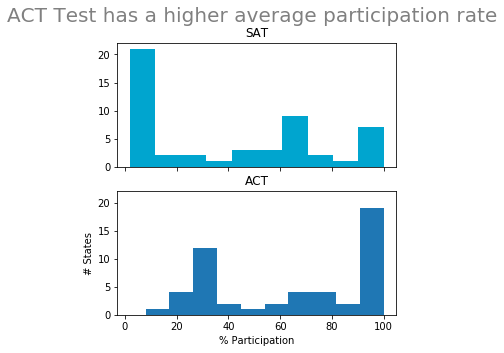

In [57]:

fig, ax = plt.subplots(nrows=2, ncols=1,figsize=(5,5),sharex=True, sharey=True)
ax[0].hist(df_merged['sat_participation'],bins=10, label='SAT Participation',color='#00A5CF')
ax[0].set_title("SAT")
ax[1].hist(df_merged['act_participation'], bins=10, label='ACT Participation')
ax[1].set_title("ACT")
ax[1].set(xlabel='% Participation', ylabel='# States')

fig.suptitle('ACT Test has a higher average participation rate', ha='center',color = 'grey',fontsize=20,va='top') 
plt.show()

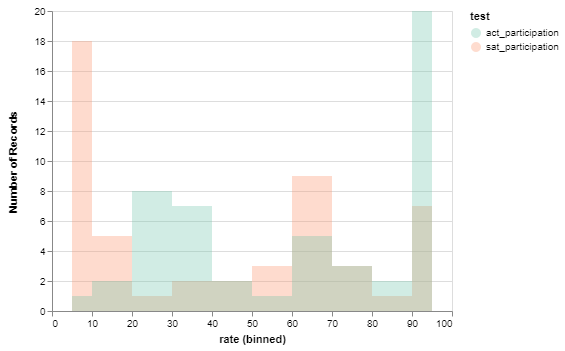

In [58]:
# Try repeating above as an Altair Layered Histogram

dftmp = df_merged[['sat_participation','act_participation']].reindex()
# reformulate dataframe into one column that contains either act_participation or sat_participation (test)
# and one that contains the rate
dftmp = pd.melt(dftmp,id_vars=dftmp.index.name,
             value_vars=dftmp.columns,var_name='test', value_name='rate')

alt.Chart(dftmp).mark_area(
    opacity=0.3,
    interpolate='step'
).encode(
    alt.X('rate', bin=alt.Bin(maxbins=10)),
    alt.Y('count()', stack=None),
    alt.Color(
        'test',
        #scale=alt.Scale(range=['#008000', '#ff0000'])
        scale=alt.Scale(scheme='set2')
    )
)

##### 17. Plot the Math(s) distributions from both data sets.

Text(0.5,0.98,'Average SAT and ACT Math Scores')

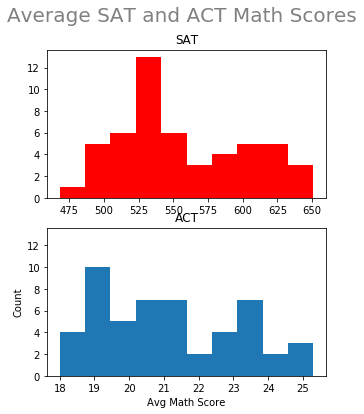

In [59]:
# we cannot share the X axis values between the two tests because they are on very different scales
# SAT: 200-800, ACT: 1-36
fig, ax = plt.subplots(nrows=2, ncols=1,figsize=(5,6),sharey=True )#,sharex=True)
ax[0].hist(df_merged['sat_math'],bins=10, label='Avg SAT Math Score',color='r')
ax[0].set_title("SAT")
ax[1].hist(df_merged['act_math'], bins=10,label='Average ACT Math Score')
ax[1].set_title("ACT")
ax[1].set(xlabel='Avg Math Score', ylabel='Count')

fig.suptitle('Average SAT and ACT Math Scores', ha='center',color = 'grey',fontsize=20,va='top')



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Text(0.5,0.98,'Average SAT and ACT Math Scores')

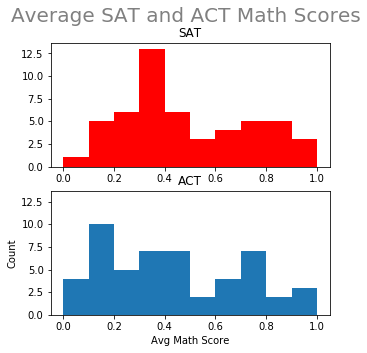

In [60]:
# what if we standardize the two score sets?  actually doesn't seem to provide any better insights
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler()

df_scaled = pd.DataFrame(scaler.fit_transform(df_merged[['sat_math','act_math']]))
df_scaled[0]
fig, ax = plt.subplots(nrows=2, ncols=1,figsize=(5,5),sharey=True )#,sharex=True)
ax[0].hist(df_scaled[0],bins=10, label='Avg SAT Math Score',color='r')
ax[0].set_title("SAT")
ax[1].hist(df_scaled[1], bins=10,label='Average ACT Math Score')
ax[1].set_title("ACT")
ax[1].set(xlabel='Avg Math Score', ylabel='Count')

fig.suptitle('Average SAT and ACT Math Scores', ha='center',color = 'grey',fontsize=20,va='top')

##### 18. Plot the Verbal distributions from both data sets.

Text(0.5,0.98,'Average SAT and ACT Verbal Scores')

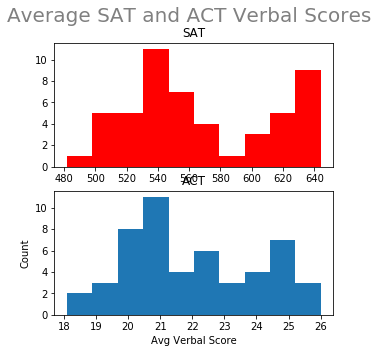

In [61]:
# we cannot share the X axis values between the two tests because they are on very different scales
# SAT: 200-800, ACT: 1-36
fig, ax = plt.subplots(nrows=2, ncols=1,figsize=(5,5),sharey=True )#,sharex=True)
ax[0].hist(df_merged['sat_rw'],label='Avg SAT Verbal Score',color='r')
ax[0].set_title("SAT")
ax[1].hist(df_merged['act_reading'], label='Average ACT Reading Score')
ax[1].set_title("ACT")
ax[1].set(xlabel='Avg Verbal Score', ylabel='Count')

fig.suptitle('Average SAT and ACT Verbal Scores', ha='center',color = 'grey',fontsize=20,va='top') 

Text(0.5,0.98,'Average SAT and ACT Total Scores')

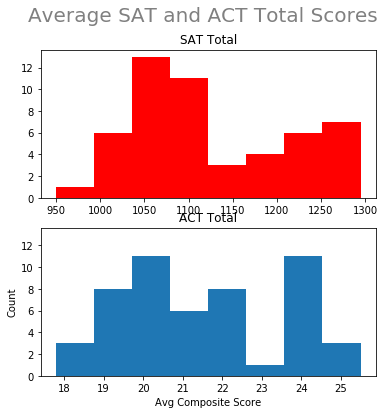

In [62]:
# plot Total / Composite scores too
fig, ax = plt.subplots(nrows=2, ncols=1,figsize=(6,6),sharey=True )#,sharex=True)
ax[0].hist(df_merged['sat_total'],bins=8, label='Avg SAT Total Score',color='r')
ax[0].set_title("SAT Total")
ax[1].hist(df_merged['act_composite'],bins=8, label='Average ACT Composite Score')
ax[1].set_title("ACT Total")
ax[1].set(xlabel='Avg Composite Score', ylabel='Count')

fig.suptitle('Average SAT and ACT Total Scores', ha='center',color = 'grey',fontsize=20,va='top') 

Text(0.5,0.98,'Average ACT English and Science Scores')

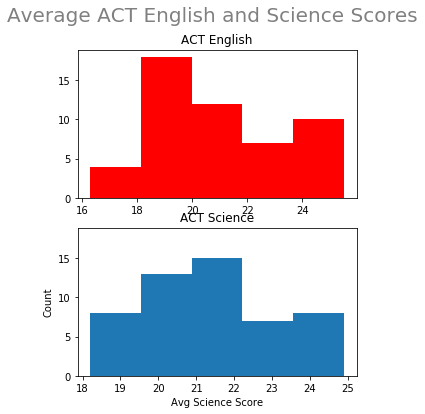

In [63]:
# Also plot ACT English and science to complete the series... 
# bin size of 5 makes it easier to see since the scores are on such a small range anyway
fig, ax = plt.subplots(nrows=2, ncols=1,figsize=(5,6),sharey=True )#,sharex=True)
ax[0].hist(df_merged['act_english'],bins=5, label='Avg SAT English Score',color='r')
ax[0].set_title("ACT English")
ax[1].hist(df_merged['act_science'], bins=5,label='Average ACT Science Score')
ax[1].set_title("ACT Science")
ax[1].set(xlabel='Avg Science Score', ylabel='Count')

fig.suptitle('Average ACT English and Science Scores', ha='center',color = 'grey',fontsize=20,va='top') 

##### 19. When we make assumptions about how data are distributed, what is the most common assumption?

We generally assume that the data is normally distributed

##### 20. Does this assumption hold true for any of our columns? Which?

* Participation rates for both tests are not normal -- they are both skewed
* the same holds true for the math and verbal scores -- they are not normally distributed.  
* THe SAT and ACT verbal scores appear to be double-peaked

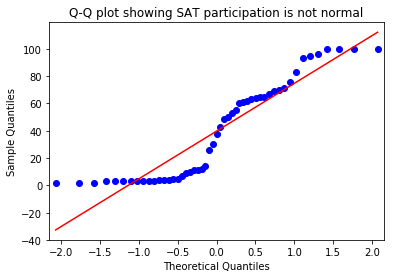

In [64]:
# q-q plot - another way to check for normality
from statsmodels.graphics.gofplots import qqplot
qqplot(df_merged['sat_participation'], line='s')
plt.title('Q-Q plot showing SAT participation is not normal')
plt.show()
#deviates from line, therefore likely not normal

##### 21. Plot some scatterplots examining relationships between all variables.

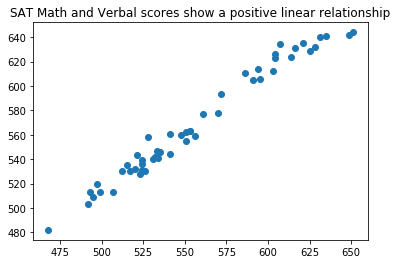

In [65]:
plt.scatter(x=df_merged['sat_math'], y=df_merged["sat_rw"])
plt.title('SAT Math and Verbal scores show a positive linear relationship')
plt.xlabel='Avg. SAT Math Score'
plt.ylabel='Avg. SAT RW Score'
plt.show()

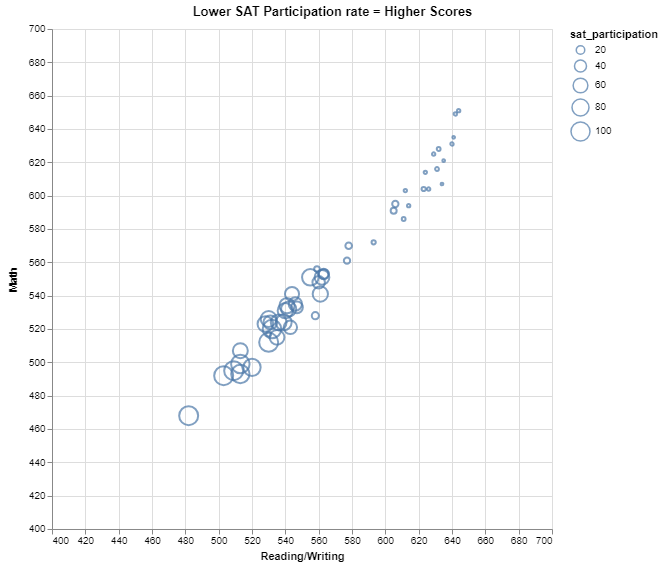

In [66]:
# repeat above as an altair plot
alt.Chart(df_merged).properties(
    width=500,
    height=500,
    title='Lower SAT Participation rate = Higher Scores'
).mark_point().encode(
    y=alt.Y('sat_math',axis=alt.Axis(title='Math'),scale=alt.Scale(domain=(400, 700))),
    x=alt.X('sat_rw', axis=alt.Axis(title='Reading/Writing'),scale=alt.Scale(domain=(400, 700))),
    size='sat_participation',
    tooltip='State'
)

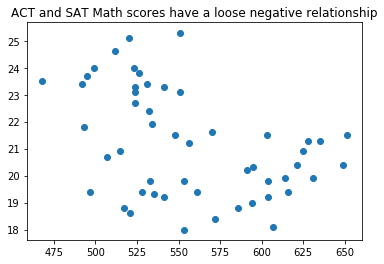

,act_math,sat_math
act_math,1.000000,-0.420456
sat_math,-0.420456,1.000000


In [67]:
# Compare SAT and ACT Math scores: Attempt 1

plt.scatter(x=df_merged['sat_math'], y=df_merged["act_math"])
plt.title('ACT and SAT Math scores have a loose negative relationship')
plt.xlabel='Avg. SAT Math Score'
plt.ylabel='Avg. ACT Math Score'
plt.show()

df_merged[['act_math','sat_math']].corr()

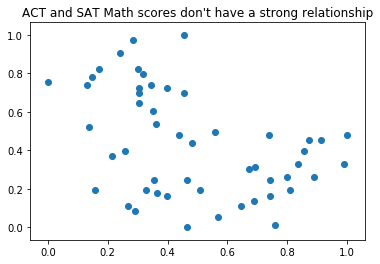

In [68]:
# Compare SAT and ACT Math scores: Attempt 2
# what if we try comparing the scaled math scores from earlier? Again, makes no noticable difference

plt.scatter(x=df_scaled[0], y=df_scaled[1])
plt.title('ACT and SAT Math scores don\'t have a strong relationship')
plt.xlabel='Avg. SAT Math Score'
plt.ylabel='Avg. ACT Math Score'
plt.show()

15 states have SAT and ACT Participation rates above 30%


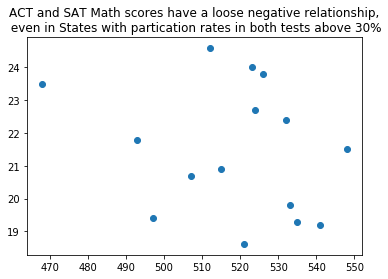

,act_math,sat_math
act_math,1.000000,-0.254083
sat_math,-0.254083,1.000000


In [69]:
# Compare SAT and ACT Math scores: Attempt 3
# what if we compare Math scores for hte subset of states that have high participation rates in both tests? (rate > 30%)
df_high_particip = df_merged[(df_merged['sat_participation'] > 30) & (df_merged['act_participation'] > 30)]
print (f"{len(df_high_particip)} states have SAT and ACT Participation rates above 30%")
plt.scatter(x=df_high_particip['sat_math'], y=df_high_particip["act_math"])
plt.title('ACT and SAT Math scores have a loose negative relationship,\n even in States with partication rates in both tests above 30%')
plt.xlabel='Avg. SAT Math Score'
plt.ylabel='Avg. ACT Math Score'
plt.show()
df_high_particip[['act_math','sat_math']].corr()
# no, it doesn't seem to have changed anything -- still a negative correlation

16 states have SAT and ACT Participation rates between 20 and 80%


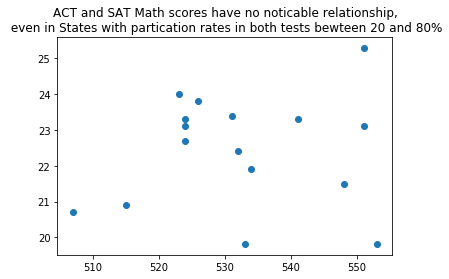

,act_math,sat_math
act_math,1.000000,0.103939
sat_math,0.103939,1.000000


In [70]:
# Compare SAT and ACT Math scores: Attempt 4
# what if we look at states with Participation rates on both tests to between 20 and 80% (so losing the extremes?)
df_med_participation = df_merged[(df_merged['sat_participation'] > 20) & (df_merged['sat_participation'] < 80 ) & (df_merged['act_participation'] > 20) & (df_merged['act_participation'] < 80)]
print (f"{len(df_med_participation)} states have SAT and ACT Participation rates between 20 and 80%")
plt.scatter(x=df_med_participation['sat_math'], y=df_med_participation["act_math"])
plt.title('ACT and SAT Math scores have no noticable relationship,\n even in States with partication rates in both tests bewteen 20 and 80%')
plt.xlabel='Avg. SAT Math Score'
plt.ylabel='Avg. ACT Math Score'
plt.show()
df_med_participation[['act_math','sat_math']].corr()
# still no real correlation bewteen SAT and ACT math scores (very small positive correlation of .1)
#df_med_participation

14 states have SAT and ACT Participation rates between 20 and 80%


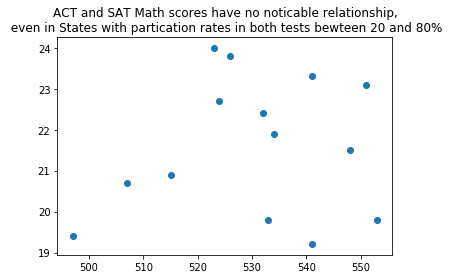

,act_math,sat_math
act_math,1.000000,0.139354
sat_math,0.139354,1.000000


In [71]:
# Compare SAT and ACT Math scores: Attempt 5
# what if we look at a subset where the difference in SAT and ACT participation rates is less than 40%?
df_40= df_merged[(df_merged['sat_participation'] -df_merged['act_participation'] < 40) & (df_merged['sat_participation'] -df_merged['act_participation'] > 0) 
         | ( (df_merged['act_participation'] -df_merged['sat_participation'] < 40) & (df_merged['act_participation'] -df_merged['sat_participation'] > 0))]

print (f"{len(df_40)} states have SAT and ACT Participation rates between 20 and 80%")
plt.scatter(x=df_40['sat_math'], y=df_40["act_math"])
plt.title('ACT and SAT Math scores have no noticable relationship,\n even in States with partication rates in both tests bewteen 20 and 80%')
plt.xlabel='Avg. SAT Math Score'
plt.ylabel='Avg. ACT Math Score'
plt.show()
df_40[['act_math','sat_math']].corr()

# again only a very tiny positive correlation (.14)

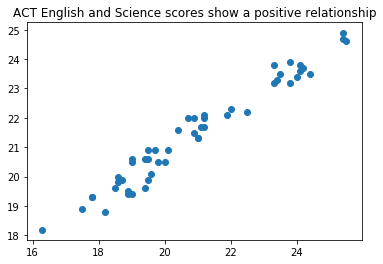

In [72]:
plt.scatter(x=df_merged['act_english'], y=df_merged["act_science"])
plt.title('ACT English and Science scores show a positive relationship')
plt.xlabel='Avg. ACT English Score'
plt.ylabel='Avg. ACT Science Score '
plt.show()

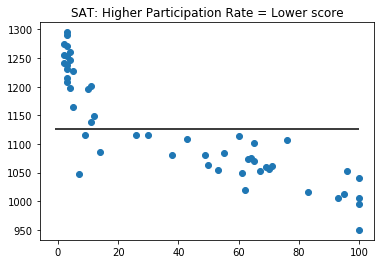

In [73]:
# Examine impact of SAT participation rate on total scoresat_total
plt.scatter(x=df_merged['sat_participation'], y=df_merged["sat_total"])
plt.title('SAT: Higher Participation Rate = Lower score')
plt.xlabel='SAT Participation Rate'
plt.ylabel='SAT Total Score'
plt.hlines(df_merged["sat_total"].mean(),-1,100,label="Average")
plt.show()

# States with lowest particatipation have best scores
# likely because those studets who write test are self-selecting "good students" looking to go to collect
# compared to states with mandatory participation where have wider range of students

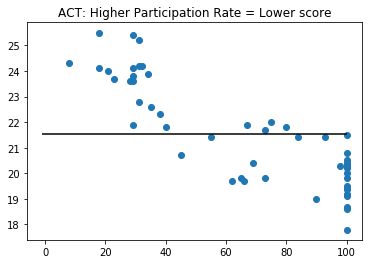

In [74]:
# Examine impact of ACT participation rate on total act composite score
plt.scatter(x=df_merged['act_participation'], y=df_merged["act_composite"])
plt.title('ACT: Higher Participation Rate = Lower score')
plt.xlabel='ACT Participation Rate'
plt.ylabel='ACT Total Score'
plt.hlines(df_merged["act_composite"].mean(),-1,100,label="Average")
plt.show()

# add line showing national average?

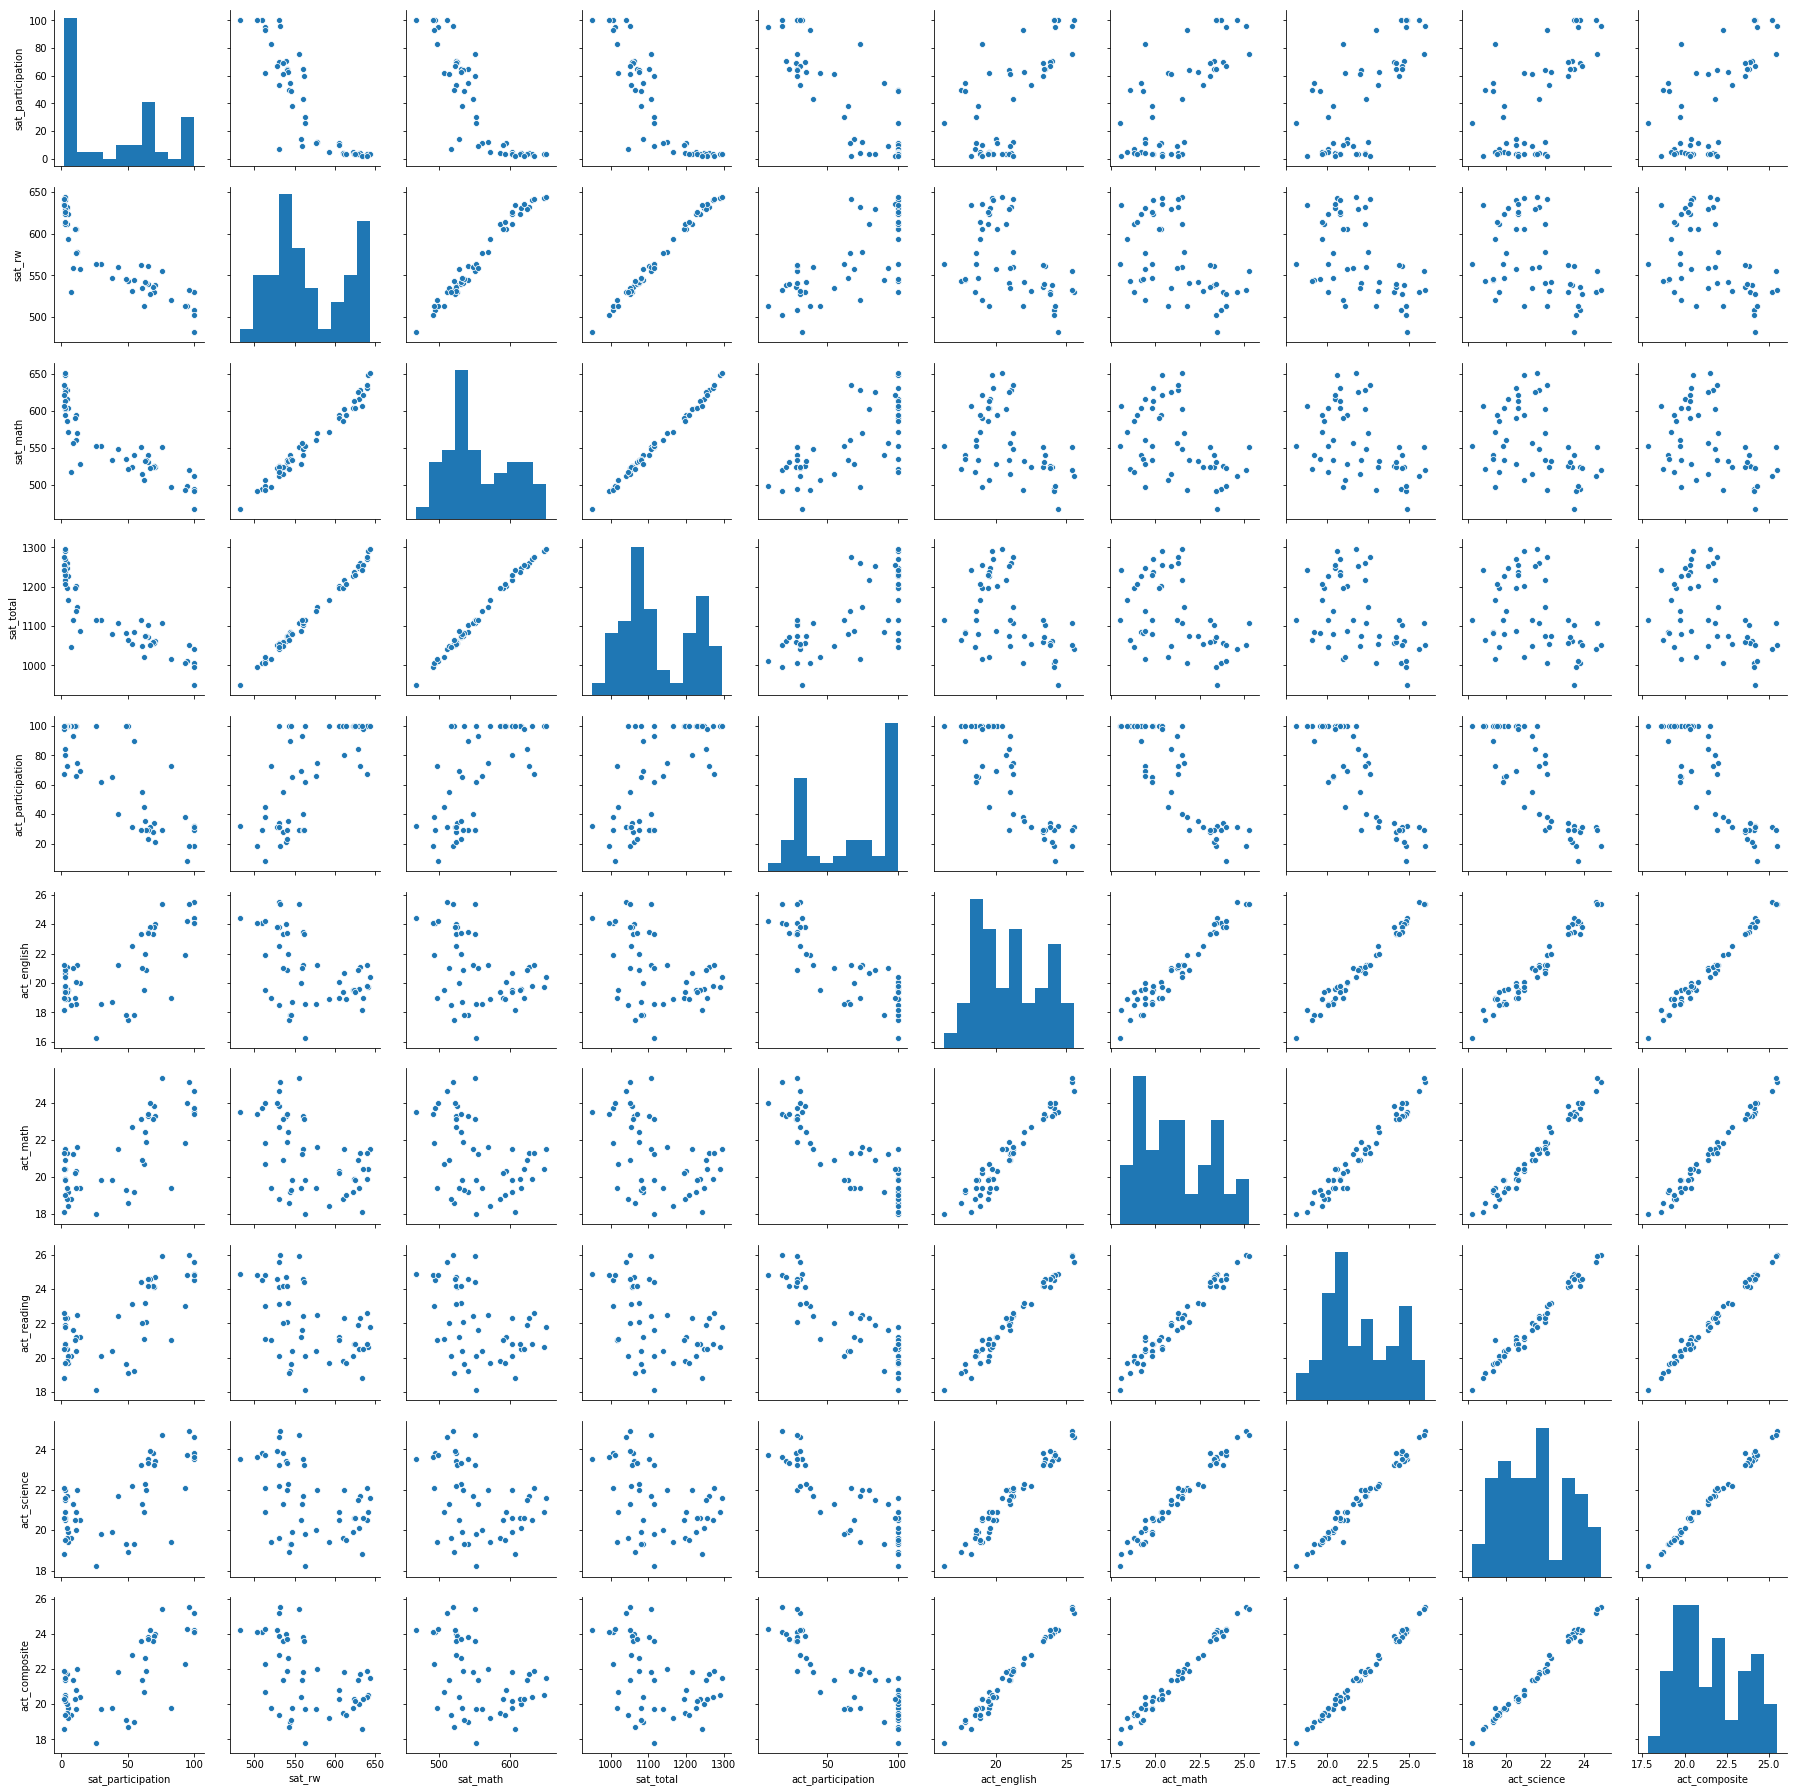

In [75]:
# create scatter plots for all combinations of columns
# gives a quick visual overview of all possible relationships
sns.pairplot(df_merged, kind='scatter')

##### 22. Are there any interesting relationships to note?

### Within each test
* Sat Math and Verbal scores appear to have a strong positive corelation (i.e. states with the higher math scores also tend to have high verbal scores)
* ACT english adn science scores appear to have a strong positive correlation
* generally, within each test, the different components tend to be positively correlated

### Comparing SAT and ACT test scores
* It seems difficult to compare the math scores between the ACT and SAT tests.  You would expect a strong positive relationship, however, the results are much more mixed

### Impact of State Participation Rate on Test Scores
* for the SAT, there is a negative relationship between participation rate and test score.  States with lower participation rates tend to have lower average scores, while states with higher participation rates have higher average scores.  This makes sense since states that require all graduates to write the test will have a more diverse student body writing the test.  On the other hand, in states that the test is optional, students chosing to write the test will be self-selecting and generally the "better" (higher scoring) students hoping to go to College
* The same holds true for the ACT test



##### 23. Create box plots for each variable. 

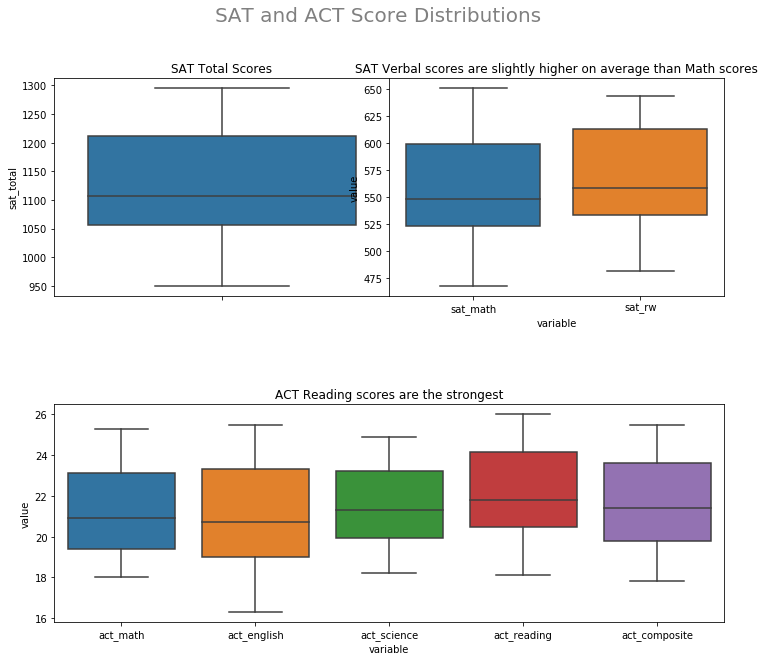

In [76]:
# plot the SAT total and math/verbal scores in different subplots since the total score
# is on a very different scale from the component parts
fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(12,10),sharex=False, sharey=False)

fig.suptitle('SAT and ACT Score Distributions', ha='center',color = 'grey',fontsize=20,va='top',) 

ax[0][0] = sns.boxplot(x="sat_total",  data=df_merged, orient='v', ax=ax[0][0])
ax[0][0].set_title(f"SAT Total Scores")

ax[0][1] =sns.boxplot(x="variable", y="value", data=pd.melt(df_merged[['sat_math', 'sat_rw']]),ax=ax[0][1])
ax[0][1].set_title(f"SAT Verbal scores are slightly higher on average than Math scores")
plt.subplot(2,1,2)
ax[1][0]=sns.boxplot(x="variable", y="value", data=pd.melt(df_merged[['act_math', 'act_english','act_science','act_reading','act_composite']]))
ax[1][0].set_title('ACT Reading scores are the strongest')
fig.subplots_adjust(hspace = .5, wspace=.001)


Text(0.5,1,'ACT Test Participation is higher than for the SAT Test')

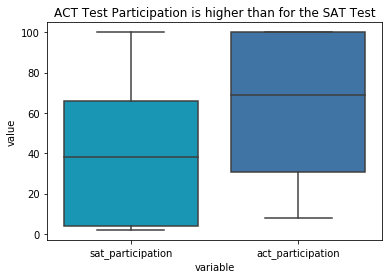

In [79]:
my_pal = {"sat_participation": "#00A5CF", "act_participation": "#2E75B6"}

blot = sns.boxplot(x="variable", y="value", data=pd.melt(df_merged[['sat_participation', 'act_participation']]),palette=my_pal)

plt.title('ACT Test Participation is higher than for the SAT Test')



##### BONUS: Using Tableau, create a heat map for each variable using a map of the US. 

### Mapping participation by state 

* SAT Participation Rates: https://public.tableau.com/views/SATParticipationRatesbyState/Sheet1?:embed=y&:display_count=yes&publish=yes
* ACT Participation Rates
https://public.tableau.com/views/ACTTestParticipationByState/Sheet2?:embed=y&:display_count=yes&publish=yes

We can see clearly that, generally, States with a high SAT participation rate have a low ACT partication rate and vice versa

## Step 4: Descriptive and Inferential Statistics

##### 24. Summarize each distribution. As data scientists, be sure to back up these summaries with statistics. (Hint: What are the three things we care about when describing distributions?)

In [81]:
summary_stats=[]
for col in df_merged.columns[1:]:
    #print(f'{col}: {df_merged[col].mean()}, {df_merged[col].std()}')
    summary_stats.append([col,round(df_merged[col].mean(),2),round(df_merged[col].std(),2)])
summary_stats

[['sat_participation', 39.8, 35.28],
 ['sat_rw', 569.12, 45.67],
 ['sat_math', 556.88, 47.12],
 ['sat_total', 1126.1, 92.49],
 ['act_participation', 65.25, 32.14],
 ['act_english', 20.93, 2.35],
 ['act_math', 21.18, 1.98],
 ['act_reading', 22.01, 2.07],
 ['act_science', 21.46, 1.75],
 ['act_composite', 21.52, 2.02]]

In [82]:
df_merged.describe()


,sat_participation,sat_rw,sat_math,sat_total,act_participation,act_english,act_math,act_reading,act_science,act_composite
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,39.803922,569.117647,556.882353,1126.098039,65.254902,20.931373,21.182353,22.013725,21.462745,21.519608
std,35.276632,45.666901,47.121395,92.494812,32.140842,2.353677,1.981989,2.067271,1.753392,2.020695
min,2.000000,482.000000,468.000000,950.000000,8.000000,16.300000,18.000000,18.100000,18.200000,17.800000
25%,4.000000,533.500000,523.500000,1055.500000,31.000000,19.000000,19.400000,20.450000,19.950000,19.800000
50%,38.000000,559.000000,548.000000,1107.000000,69.000000,20.700000,20.900000,21.800000,21.300000,21.400000
75%,66.000000,613.000000,599.000000,1212.000000,100.000000,23.300000,23.100000,24.150000,23.200000,23.600000
max,100.000000,644.000000,651.000000,1295.000000,100.000000,25.500000,25.300000,26.000000,24.900000,25.500000


### Description of the various distributions

 #### SAT:
 <table>
    <tr><td><b>Column</b></td>
        <td><b>Description</b></td>
    </tr>
    <tr><td>SAT Participation</td>
        <td>Participation is heavily skewed right.  This is further supported by the fact that the Mean (39.8) is larger than the Median (38%).  It has a very large spread, from a minimum of 2% to a maximum of 100% participation.  The IQR (inter-quartile range (distance bewteen 25th and 75 percentiles)) is also quite large: 4%-66%.  There are no obvious outliers</td>
    </tr>
    <tr><td>SAT Math</td>
        <td>The Math scores appear almost bi-modal and are skewed right.  The mean (556.88) is higher than the median (548).  The spread is from 468 to 651 with an IQR of 523.5 to 599.  There are no obvious outliers</td>
    </tr>
    <tr><td>SAT Evidence-Based Reading and Writing:</td>
        <td>The RW definitely appear to be bi-modal.  The mean (569.12) is higher than the median(559).  The spread is form 482 to 644, so slightly less broad than the Math scores.  The IQR is from 533.5 to 613.  SAT RW scores are higher, on average, than the math scores, but are also less spread out.  There are no obvious outliers</td>
    </tr>
    <tr><td>SAT Total</td>
        <td>The SAT Total score also appears bi-modal, which makes sense since it is a sum of the math and RW scores.  The man score (1126.1) is higher than the median (1107).  The range is from 950 to 1295, with an IQR of 1055.5 to 1212. There are no obvious outliers</td>
    </tr>
</table>

#### ACT
 <table>
    <tr><td><b>Column</b></td>
        <td><b>Description</b></td>
    </tr>
    <tr><td>ACT Participation</td>
        <td>ACT Participation rates are heavily skewed right.  The mean(65.25) is **lower** than the median (69) .  It has a large spread, from 8% to 100%, but is actually less spread out than the SAT scores.  The IQR goes from 31 to 100
        </td>
    </tr>
    <tr><td>ACT Math</td>
        <td>The ACT math scores appear almost bi-modal and skewed right.  The mean (21.2) is higher than the median of 20.9.  The spread is from 18 to 25.3 and the IQR is 19.4 to 23.1
        </td>
    </tr>
    <tr><td>ACT Reading</td>
        <td>The ACT Reading score also appeaers bi-modal.  The mean (22.0) is only slightly higher than the median of 21.8. The range is from 18.1 to 26 with an IQR of 20.45 to 24.15.  ACT Reading scores have the highest mean of all the ACT test components, as well as the largest maximum score (26).  
        </td>
    </tr>
        <tr><td>ACT Science</td>
        <td>ACT Science scores appear more symmetrical than the other test scores in this dataset.  The mean (21.5) is only very slightly higher than thee median (21.3).  Scores range from 18.2 to 24.9 and the IQR is 19.95 to 23.2.  The standard deviation is the lowest of all the ACT test components
        </td>
    </tr>
        <tr><td>ACT English</td>
        <td>ACT English scores appeaer skewed right.  The mean (20.93) is slightly higher than the median (20.7). The scores range from 16.3 to 25.5 with an IQR of 19 to 23.3
        </td>
    </tr>
    <tr><td>ACT Composite</td>
        <td>ACT Composite scores appear bi-modal.  The mean (21.52) is slightly higher than the median (21.4).  Scores range from 17.8 to 25.5 and the IQR is from 19.8 to 23.6</td>
    </tr>
</table>


##### 25. Summarize each relationship. Be sure to back up these summaries with statistics.

In [83]:
df_merged.corr()

,sat_participation,sat_rw,sat_math,sat_total,act_participation,act_english,act_math,act_reading,act_science,act_composite
sat_participation,1.000000,-0.874326,-0.855091,-0.867540,-0.841234,0.686889,0.710697,0.705352,0.654100,0.694748
sat_rw,-0.874326,1.000000,0.987056,0.996661,0.716153,-0.461345,-0.486126,-0.488441,-0.423713,-0.470382
sat_math,-0.855091,0.987056,1.000000,0.996822,0.682572,-0.420673,-0.420456,-0.442410,-0.367364,-0.417817
sat_total,-0.867540,0.996661,0.996822,1.000000,0.701477,-0.441947,-0.454116,-0.466558,-0.396291,-0.445020
act_participation,-0.841234,0.716153,0.682572,0.701477,1.000000,-0.843501,-0.861114,-0.866620,-0.837830,-0.858134
act_english,0.686889,-0.461345,-0.420673,-0.441947,-0.843501,1.000000,0.967803,0.985999,0.979082,0.990856
act_math,0.710697,-0.486126,-0.420456,-0.454116,-0.861114,0.967803,1.000000,0.979630,0.985648,0.990451
act_reading,0.705352,-0.488441,-0.442410,-0.466558,-0.866620,0.985999,0.979630,1.000000,0.987361,0.995069
act_science,0.654100,-0.423713,-0.367364,-0.396291,-0.837830,0.979082,0.985648,0.987361,1.000000,0.994207
act_composite,0.694748,-0.470382,-0.417817,-0.445020,-0.858134,0.990856,0.990451,0.995069,0.994207,1.000000


### Relationships

* SAT and ACT partication rates show a strong negative relationship (pearson correlation coeffienct = -.84).  This makes sense, since it seems that students in each state have a tendency to write one test over the other (especially in states where particiation in one test is mandatory -- fewer students would be likely to write the other test)
* SAT Math and Reading/Writing scores are very strongly positively correlated (corr = .99).  States that have high math scores, also have high reading/writing scores
* SAT and ACT total/composite scores have a weak negative relationship (corr=-.45).  This is counter-intuitive since good students should be good students regardless of which test they take, but our results are likely confounded by the extreme variation in state participation rates.  For instance, if 100% of students in X state write the ACT, then only a few are likely to write the SAT and probably their results will show higher SAT scores than ACT scores since they will likely be a more motivated cohort.  We cannot, therefore, have confidence that this relationship is meaningful based on the information we have 
* The various ACT components are all strongly positively correlated with each other (i.e. ACT English adn Math show a pearson corelation coefficient of 0.97).  


##### 26. Execute a hypothesis test comparing the SAT and ACT participation rates. Use $\alpha = 0.05$. Be sure to interpret your results.

#### Experiment 1

* **Null Hypothesis to test**: SAT and ACT Participation rates are the same
* **Alternative Hypothesis**: SAT and ACT Participation rates are different

We will perform a students T-Test to test this hypothesis.  The test assumes that the populations have identical variances, which seems reasonable based on our observations.  However, the distributions are not normal, which may invalidate these test results.  There is an alternative test, the Mann-Whitney-Wilcoxon (MWW) RankSum test, which does not assume a normal distribution.  Let's try calculating both...

In [84]:
# Student T Test
t_stat, p_value = stats.ttest_ind(df_merged['sat_participation'], df_merged['act_participation'])
print(t_stat, p_value )

-3.8085778908170544 0.00024134203698662353


In [85]:
# Rank Sum Test
z_stat, p_val = stats.ranksums(df_merged['sat_participation'], df_merged['act_participation'])  
  
print(z_stat, p_val )  

-3.878423904133869 0.00010513540211149264


**Interpretation**: 
According to the T-Test: If the null hypothesis were true, we would only have a 0.026% chance of observing this large a difference (-3.81) in particiation rates

According to the MMW RankSumtest: If the null hypothesis were true, we would only have a 0.01% chance of observing this large a difference (-3.88) in particiation rates

Either way, since this p value is significantly less than our threshold criteria of 5%, we can reject the null hypothesis and conclude that there is a statistically significant difference in SAT and ACT Test participation rates.


#### Experiment 2: SAT Total scores are higher in states with where ACT Participation is < 100%

* **Null Hypothesis**: SAT total scores are not affected by whether or not states require students to write the ACT
* **Alternative hypothesis**: SAT total scores are different (higher) in states that require students to write the ACT

In [86]:

z_stat, p_val = stats.ranksums(df_merged[(df_merged['act_participation'] ==100)]['sat_total'], df_merged[(df_merged['act_participation'] <100)]['sat_total'])

print(f"{t_stat},{p_value:0.8f}") 
#p_value<0.05

-3.8085778908170544,0.00024134


In [87]:
df_merged[(df_merged['act_participation'] ==100)]['sat_total'].mean()

1195.1764705882354

In [88]:
df_merged[(df_merged['act_participation'] <100)]['sat_total'].mean()

1091.5588235294117

**Interpretation**: if the null hypothesis were true, we would have a very small chance (.02%) of observing this large a difference in SAT Total Scores (-3.81). This is less than our threshold of 0.05.  Therefore, we can conclude that ACT participation rates of 100% do affect SAT total scores (ACT Participation Rate of 100% = higher SAT score, while ACT Participation Rates of < 100% = lower SAT scores)

##### 27. Generate and interpret 95% confidence intervals for SAT and ACT participation rates.

The formula we learned in class (to multiply z by the standard error) is not appropriate in this example as we are not sampling from an unknown population of State Participation rates.  Our dataset includes information for the entire population (all States in 2017) and so we can instead fall back on the empirical rule (also known as the three sigma rule).  This rule indicates that, given a normal distribution, 68% of your observations will fall within +-1 standard deviation of the mean, 95% within += 2 standard deviations of the mean and 99.7% within += 3 standard deviations of the mean.  Again, however, we have a potential problem since our participation rates are right skewed and are therefore NOT normal.  Let's try this using three different methods and examine our results...

1. Empirical Formula


In [89]:
# Empirical formula: 95% confidence interval for SAT participation rate based on 2 standard devaitions from the mean
# the results is clearly nonesensical since we already know the rate, by definition, has to fall between 0 and 100
lower_bound = df_merged['sat_participation'].mean() - (df_merged['sat_participation'].std() * 2)
upper_bound = df_merged['sat_participation'].mean() + (df_merged['sat_participation'].std() * 2)
print(lower_bound,upper_bound)

-30.74934297139864 110.35718610865354


In [90]:
# repeating Empirical Formula for ACT
lower_bound = df_merged['act_participation'].mean() - (df_merged['act_participation'].std() * 2)
upper_bound = df_merged['act_participation'].mean() + (df_merged['act_participation'].std() * 2)
print(lower_bound,upper_bound)

0.9732179290106586 129.53658599255795


2. Bootstrap confidence intervals

This does not make any assumption about the shape of the distribution.  In this case, the lower limit is the 0.025-quantile of and the upper limit is the 0.975-quantile

In [91]:
alpha=0.95
ordered = df_merged['sat_participation'].sort_values()
lower = ordered.quantile((1-alpha)/2) 
upper = ordered.quantile(alpha+((1-alpha)/2))   
print (lower, upper)    


2.0 100.0


In [92]:
alpha=0.95
ordered = df_merged['act_participation'].sort_values()
lower = ordered.quantile((1-alpha)/2) 
upper = ordered.quantile(alpha+((1-alpha)/2))    
print (lower, upper)   

18.0 100.0


3. Standard error formula

In [93]:
# first get the standard error for SAT tests
n = len(df_merged) #30
mean_sat_participation = np.mean(df_merged['sat_participation'])
standard_error = np.std(df_merged['sat_participation'], ddof=1)/np.sqrt(n)
print ('Mean = ',mean_sat_participation )
print('Standard error = ', standard_error)
print('Simulation estimate = ', np.std(df_merged['sat_participation']))
z = 1.96  # for 95%
ci_lower = mean_sat_participation-z*standard_error
ci_upper = mean_sat_participation+z*standard_error
ci_lower, ci_upper

Mean =  39.80392156862745
Standard error =  4.9397165599279065
Simulation estimate =  34.929070766645076


(30.122077111168757, 49.48576602608615)

In [94]:
# repeat for ACT
n = len(df_merged) #30
mean_act_participation = np.mean(df_merged['act_participation'])
standard_error = np.std(df_merged['act_participation'], ddof=1)/np.sqrt(n)
print ('Mean = ',mean_act_participation )
print('Standard error = ', standard_error)
print('Simulation estimate = ', np.std(df_merged['act_participation']))
z = 1.96  # for 95%
ci_lower = mean_act_participation-z*standard_error
ci_upper = mean_act_participation+z*standard_error
ci_lower, ci_upper

Mean =  65.25490196078431
Standard error =  4.5006180958736985
Simulation estimate =  31.824175751231802


(56.43369049287186, 74.07611342869676)

### Interpretation

None of these methods returned very helpful information.  Of the three, the bootstrap method was probably the most appropriate. In that case, we can be 95% confident that the mean for SAT particiation rate falls between 2 and 100% and the ACT participation rate falls between 18 and 100.  


##### 28. Given your answer to 26, was your answer to 27 surprising? Why?

The P-value indicated that the differences between SAT and ACT partication rates are statistically significant so we would expect them to have quite different population means.  However, the 95% confidence intervals overlap considerably

##### 29. Is it appropriate to generate correlation between SAT and ACT math scores? Why?

It is not appropriate to compare the ACT and SAT math scores from the raw data due to the extreme differences in participation rates.  We can see that states with high ACT participation tend to have low SAT participation (and vice versa), so we would need to account for that variability.  Furthermore, to make a meaningful comparison between the test scores, ideally we should examine the results from a large set of students who wrote BOTH tests. 

##### 30. Suppose we only seek to understand the relationship between SAT and ACT data in 2017. Does it make sense to conduct statistical inference given the data we have? Why?

We can do some investigation, such as examining the relationship between participation rates and scores (both within and between the two tests).  But we do not have enough data to compare scores between the two tests.  We can see that scores tend to decline with a higher participation rate and since we have very few states that even come close to a similar participation rate, we cannot compare ACT to SAT test scores.  This is because the scores in our dataset are confounded by participation rate.  
<br />
To compare the tests accurately, we should have the same set of students write both tests so we can get a baseline comparision of test scores.  If that's not possible, then we would need to account for the variability in participation rates in different states -- perhaps dropping states with very low rates in one test or coming up with a new feature that accounts for both participation rate and score

### Extra: Bring in State Population for a couple other analysis
Data is from: https://www.census.gov/data/tables/2017/demo/popest/state-total.html

In [95]:
df_states = pd.read_csv('nst-est2017-alldata.csv')
df_states.head()

,SUMLEV,REGION,DIVISION,STATE,NAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,...,RDOMESTICMIG2015,RDOMESTICMIG2016,RDOMESTICMIG2017,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,RNETMIG2016,RNETMIG2017
0,10.0,0,0,0.0,United States,308745538.0,308758105.0,309338421.0,311644280.0,313993272.0,...,0.000000,0.000000,0.000000,2.720900,2.920371,2.883643,3.173228,3.516743,3.513394,3.423941
1,20.0,1,0,0.0,Northeast Region,55317240.0,55318350.0,55388349.0,55642659.0,55860261.0,...,-6.103092,-6.619089,-5.559570,1.467950,0.779137,0.605873,-0.082832,-0.903931,-1.307503,-0.288930
2,20.0,2,0,0.0,Midwest Region,66927001.0,66929794.0,66973360.0,67141501.0,67318295.0,...,-3.458531,-3.307295,-2.304640,-1.187519,-1.010696,-0.120354,-0.752477,-1.323952,-1.160735,-0.191323
3,20.0,3,0,0.0,South Region,114555744.0,114563024.0,114869241.0,116060993.0,117291728.0,...,3.788037,3.592695,2.900528,5.544289,5.831747,5.362083,6.317310,7.336162,7.113818,6.304010
4,20.0,4,0,0.0,West Region,71945553.0,71946937.0,72107471.0,72799127.0,73522988.0,...,1.613450,2.099001,1.475519,2.798796,3.521423,3.396627,4.163576,5.067452,5.488965,4.737979


In [96]:
# table has a lot more information than we need so just select the columns for interest
# POPESTIMATE2017 contains the estimated state populations in 2017
df_states = df_states[['NAME','POPESTIMATE2017']]
df_states.head(8)

,NAME,POPESTIMATE2017
0,United States,325719178.0
1,Northeast Region,56470581.0
2,Midwest Region,68179351.0
3,South Region,123658624.0
4,West Region,77410622.0
5,Alabama,4874747.0
6,Alaska,739795.0
7,Arizona,7016270.0


In [97]:
df_states.tail()

,NAME,POPESTIMATE2017
54,Wisconsin,5795483.0
55,Wyoming,579315.0
56,Puerto Rico,3337177.0
57,NaN,NaN
58,NaN,NaN


In [98]:
# drop the first five summary rows and the last three rows (Puerto Rico and NAN rows)

df_states = df_states.iloc[5:56]
len(df_states) # confirm now 51 rows

51

In [99]:
df_states.info() # datatypes look ok

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 5 to 55
Data columns (total 2 columns):
NAME               51 non-null object
POPESTIMATE2017    51 non-null float64
dtypes: float64(1), object(1)
memory usage: 900.0+ bytes


In [100]:
# merge into our existing dataframe for population comparison
# merge the datasets together, matching up on the State column
df_merged2 = pd.merge(df_merged,df_states,left_on='State',right_on='NAME').drop(columns='NAME')
df_merged2.head()


,State,sat_participation,sat_rw,sat_math,sat_total,act_participation,act_english,act_math,act_reading,act_science,act_composite,POPESTIMATE2017
0,District of Columbia,100.0,482,468,950,32.0,24.4,23.5,24.9,23.5,24.2,693972.0
1,Michigan,100.0,509,495,1005,29.0,24.1,23.7,24.5,23.8,24.1,9962311.0
2,Connecticut,100.0,530,512,1041,31.0,25.5,24.6,25.6,24.6,25.2,3588184.0
3,Delaware,100.0,503,492,996,18.0,24.1,23.4,24.8,23.6,24.1,961939.0
4,New Hampshire,96.0,532,520,1052,18.0,25.4,25.1,26.0,24.9,25.5,1342795.0


In [101]:
df_merged2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 12 columns):
State                51 non-null object
sat_participation    51 non-null float64
sat_rw               51 non-null int64
sat_math             51 non-null int64
sat_total            51 non-null int64
act_participation    51 non-null float64
act_english          51 non-null float64
act_math             51 non-null float64
act_reading          51 non-null float64
act_science          51 non-null float64
act_composite        51 non-null float64
POPESTIMATE2017      51 non-null float64
dtypes: float64(8), int64(3), object(1)
memory usage: 5.2+ KB


In [102]:
# VERY ROUGH estimate of per capita participation in SAT based on state population
# We cannot make any conclusions from this data set on the actual number of students who wrote the SAT
# state population * sat participation rate

# total US population
us_total_pop = df_merged2['POPESTIMATE2017'].sum()
# index 1 is sat_participation and index 12 is POPESTIMATE2017      
total_students_writing_sat = round(sum([val[1]/100 * val[11] for val in df_merged2.values]),2)
# index 5 is act participation
total_students_writing_act = round(sum([val[5]/100 * val[11] for val in df_merged2.values]),2)

print(total_students_writing_sat, total_students_writing_act)

# rough estimate of per capita participation in each test
prop_wrote_sat = round(total_students_writing_sat/us_total_pop,2)
prop_wrote_act = round(total_students_writing_act/us_total_pop,2)
print(f"Rough SAT/per capita participation rate was  {prop_wrote_sat} vs {prop_wrote_act} for the ACT")

153849982.45 189736629.25
Rough SAT/per capita participation rate was  0.47 vs 0.58 for the ACT


### Recommendation for increasing SAT participation:
One possibility is to target states where the ACT test is not required (participation < 100%) and focus on the states with the highest population.  The College Board could run an advertising campaign focusing on those states promoting the benefits of the SAT

In [103]:
#
# target US states with ACT Participation > SAT Participation but < 100%
target_states = df_merged2[(df_merged2['act_participation'] > df_merged2['sat_participation']) & (df_merged2['act_participation'] <100)]
target_states.sort_values('POPESTIMATE2017', ascending=False)

# Tableau visualization: https://public.tableau.com/profile/a.gordon5305#!/vizhome/States_To_Target_for_SAT/Sheet2?publish=yes

,State,sat_participation,sat_rw,sat_math,sat_total,act_participation,act_english,act_math,act_reading,act_science,act_composite,POPESTIMATE2017
33,Illinois,9.0,559,556,1115,93.0,21.0,21.2,21.6,21.3,21.4,12802023.0
29,Ohio,12.0,578,570,1149,75.0,21.2,21.6,22.5,22.0,22.0,11658609.0
26,Arizona,30.0,563,553,1116,62.0,18.6,19.8,20.1,19.8,19.7,7016270.0
50,Iowa,2.0,641,635,1275,67.0,21.2,21.3,22.6,22.1,21.9,3145711.0
38,Kansas,4.0,632,628,1260,73.0,21.1,21.3,22.3,21.7,21.7,2913123.0
31,New Mexico,11.0,577,561,1138,66.0,18.6,19.4,20.4,20.0,19.7,2088070.0
44,Nebraska,3.0,629,625,1253,84.0,20.9,20.9,21.9,21.5,21.4,1920076.0
28,West Virginia,14.0,558,528,1086,69.0,20.0,19.4,21.2,20.5,20.4,1815857.0
20,Hawaii,55.0,544,541,1085,90.0,17.8,19.2,19.2,19.3,19.0,1427538.0
43,South Dakota,3.0,612,603,1216,80.0,20.7,21.5,22.3,22.0,21.8,869666.0


For presentation, lets get some stats on SAT average in states with/without 100% participation

In [104]:
df_merged2[(df_merged2['act_participation'] ==100)]['sat_participation'].mean()

11.235294117647058

In [105]:
df_merged2[(df_merged2['act_participation'] < 100)]['sat_participation'].mean()

54.088235294117645

In [106]:
len(df_merged2[(df_merged2['sat_participation'] ==100)])

4

In [107]:
len(df_merged2[(df_merged2['act_participation'] ==100)])

17

In [108]:
# bar chart comparing SAT participation and total scores for states with/without ACT participation rates of 100%
#df_merged[(df_merged['act_participation'] ==100)]['sat_total']
df_merged['is_act_req'] = df_merged['act_participation'] ==100
df_merged.head()

,State,sat_participation,sat_rw,sat_math,sat_total,act_participation,act_english,act_math,act_reading,act_science,act_composite,is_act_req
8,District of Columbia,100.0,482,468,950,32.0,24.4,23.5,24.9,23.5,24.2,False
22,Michigan,100.0,509,495,1005,29.0,24.1,23.7,24.5,23.8,24.1,False
6,Connecticut,100.0,530,512,1041,31.0,25.5,24.6,25.6,24.6,25.2,False
7,Delaware,100.0,503,492,996,18.0,24.1,23.4,24.8,23.6,24.1,False
29,New Hampshire,96.0,532,520,1052,18.0,25.4,25.1,26.0,24.9,25.5,False


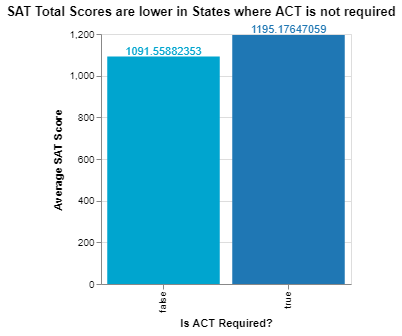

In [109]:
bars = alt.Chart(df_merged,height=250,width=250).mark_bar().encode(
   # x="is_act_req:O",
    x=alt.X('is_act_req', axis=alt.Axis(title='Is ACT Required?')),
    y=alt.Y("mean(sat_total):Q", axis=alt.Axis(title='Average SAT Score')),
    color=alt.Color('is_act_req:O', scale=alt.Scale(range=["#00A5CF","#1f77b4"]),legend = None)
).properties(title="SAT Total Scores are lower in States where ACT is not required")

text = bars.mark_text(
    align='center',
    baseline='middle',
    dy=-5
   # dx=3
).encode(
    text='mean(sat_total):Q'
)
bars + text

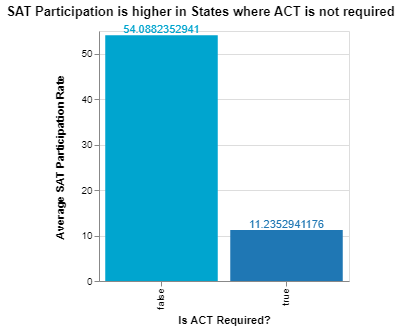

In [110]:
bars=alt.Chart(df_merged,height=250,width=250).mark_bar().encode(
    x=alt.X('is_act_req', axis=alt.Axis(title='Is ACT Required?')),
    y=alt.Y("mean(sat_participation):Q", axis=alt.Axis(title='Average SAT Participation Rate')),
    color=alt.Color('is_act_req:O', scale=alt.Scale(range=["#00A5CF","#1f77b4"]),legend = None)
).properties(title="SAT Participation is higher in States where ACT is not required")

text = bars.mark_text(
    align='center',
    baseline='middle',
    dy=-5
   # dx=3
).encode(
    text='mean(sat_participation):Q'
)
bars + text